In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.corr()

/tmp/ipykernel_27656/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### Only using 2 variables

Drop `SepalLengthCm` and `SepalWidthCm` cols

In [5]:
DROP_COLS = ["Id", "SepalLengthCm", "SepalWidthCm"]

In [6]:
def drop_columns(cols_name):
    data.drop(cols_name, axis=1, inplace=True)

In [7]:
drop_columns(DROP_COLS)

In [8]:
data.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [9]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Only Pick Virginica

Nanti sisa nya akan di convert jadi Non-Virginica

In [10]:
data["Species"][data["Species"] != "Iris-virginica"] = "Non-virginica"

/tmp/ipykernel_27656/4184929900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Species"][data["Species"] != "Iris-virginica"] = "Non-virginica"


In [11]:
data

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Non-virginica
1,1.4,0.2,Non-virginica
2,1.3,0.2,Non-virginica
3,1.5,0.2,Non-virginica
4,1.4,0.2,Non-virginica
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


In [12]:
data["Species"].value_counts()

Non-virginica     100
Iris-virginica     50
Name: Species, dtype: int64

### Create Visualization

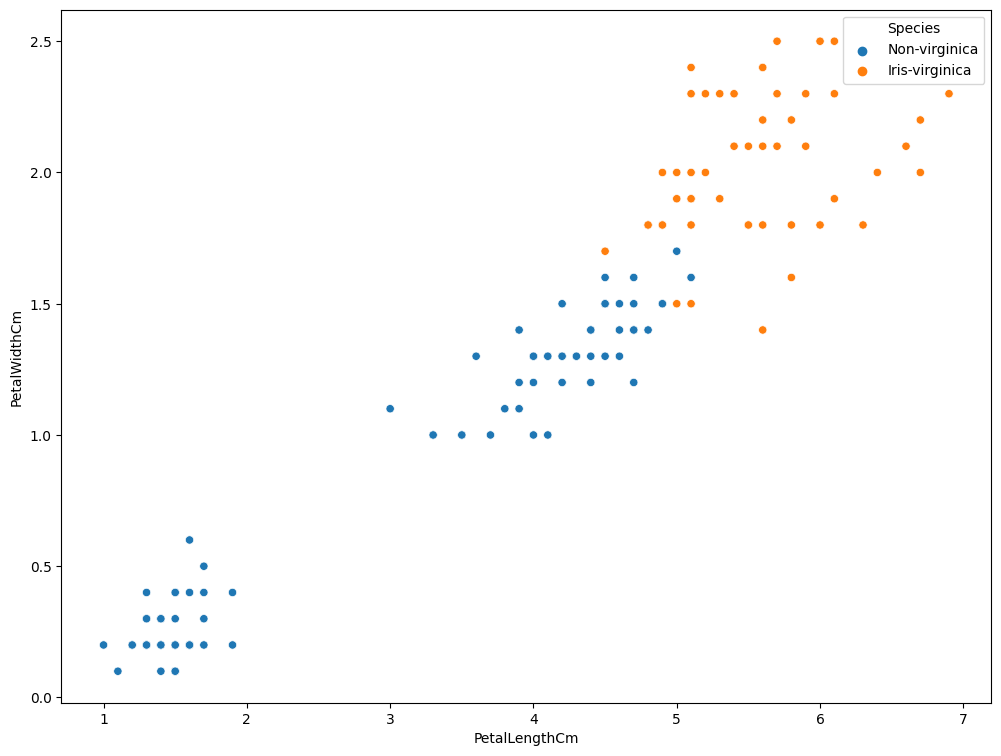

In [13]:
plt.figure(figsize=(12, 9))
sns.scatterplot(data=data,
                x="PetalLengthCm",
                y="PetalWidthCm",
                hue="Species")

plt.show()

### Split Input Output 

In [14]:
def split_input_output(data, output_col):
    X = data.drop(columns=output_col)
    y = data[output_col]
    
    return X, y

In [15]:
X, y = split_input_output(data=data,
                          output_col="Species")

In [16]:
X.head()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [17]:
X.shape

(150, 2)

In [18]:
y.head()

0    Non-virginica
1    Non-virginica
2    Non-virginica
3    Non-virginica
4    Non-virginica
Name: Species, dtype: object

In [19]:
y.shape

(150,)

In [20]:
y.value_counts()

Non-virginica     100
Iris-virginica     50
Name: Species, dtype: int64

### Baseline Model 

In [21]:
from sklearn.dummy import DummyClassifier

In [22]:
dummy_clf = DummyClassifier(strategy="most_frequent")

In [24]:
dummy_clf.fit(X, y)

DummyClassifier(strategy='most_frequent')

In [26]:
dummy_clf.predict(X)

array(['Non-virginica', 'Non-virginica', 'Non-virginica', 'Non-virginica',
       'Non-virginica', 'Non-virginica', 'Non-virginica', 'Non-virginica',
       'Non-virginica', 'Non-virginica', 'Non-virginica', 'Non-virginica',
       'Non-virginica', 'Non-virginica', 'Non-virginica', 'Non-virginica',
       'Non-virginica', 'Non-virginica', 'Non-virginica', 'Non-virginica',
       'Non-virginica', 'Non-virginica', 'Non-virginica', 'Non-virginica',
       'Non-virginica', 'Non-virginica', 'Non-virginica', 'Non-virginica',
       'Non-virginica', 'Non-virginica', 'Non-virginica', 'Non-virginica',
       'Non-virginica', 'Non-virginica', 'Non-virginica', 'Non-virginica',
       'Non-virginica', 'Non-virginica', 'Non-virginica', 'Non-virginica',
       'Non-virginica', 'Non-virginica', 'Non-virginica', 'Non-virginica',
       'Non-virginica', 'Non-virginica', 'Non-virginica', 'Non-virginica',
       'Non-virginica', 'Non-virginica', 'Non-virginica', 'Non-virginica',
       'Non-virginica', '

In [27]:
dummy_clf.score(X, y)

0.6666666666666666

### Train Test Split 

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [30]:
print(f"Train Data Shape: {X_train.shape, y_train.shape}")
print(f"Test Data Shape: {X_test.shape, y_test.shape}")

Train Data Shape: ((120, 2), (120,))
Test Data Shape: ((30, 2), (30,))


In [31]:
y_train.value_counts()

Non-virginica     80
Iris-virginica    40
Name: Species, dtype: int64

In [32]:
y_test.value_counts()

Non-virginica     20
Iris-virginica    10
Name: Species, dtype: int64

### Preprocessing

In [33]:
y_train.value_counts()

Non-virginica     80
Iris-virginica    40
Name: Species, dtype: int64

In [34]:
def convert_class(y_train, y_test, class_name):
    y_train = y_train.apply(lambda x: 1 if x == class_name else 0)
    y_test = y_test.apply(lambda x: 1 if x == class_name else 0)
    
    return y_train, y_test

In [35]:
y_train, y_test = convert_class(y_train=y_train,
                                y_test=y_test,
                                class_name="Iris-virginica")

In [36]:
y_train.value_counts()

0    80
1    40
Name: Species, dtype: int64

In [37]:
y_train.value_counts()

0    80
1    40
Name: Species, dtype: int64

In [38]:
y_test.value_counts()

0    20
1    10
Name: Species, dtype: int64

### Modelling with Logistic Regression 

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logreg = LogisticRegression()

In [41]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred_train_proba = logreg.predict_proba(X_train)

In [43]:
y_pred_train_proba

array([[4.99149131e-02, 9.50085087e-01],
       [9.27157414e-01, 7.28425863e-02],
       [9.78127099e-01, 2.18729013e-02],
       [6.48517904e-03, 9.93514821e-01],
       [4.76443763e-01, 5.23556237e-01],
       [2.91712141e-01, 7.08287859e-01],
       [9.99995958e-01, 4.04230193e-06],
       [9.99993401e-01, 6.59915191e-06],
       [9.99985798e-01, 1.42018564e-05],
       [8.92466194e-01, 1.07533806e-01],
       [5.10763352e-03, 9.94892366e-01],
       [9.99996736e-01, 3.26413720e-06],
       [9.76749441e-01, 2.32505589e-02],
       [9.99994328e-01, 5.67240160e-06],
       [2.78970655e-01, 7.21029345e-01],
       [9.99994671e-01, 5.32878252e-06],
       [2.46858378e-02, 9.75314162e-01],
       [2.93449337e-02, 9.70655066e-01],
       [6.75821465e-01, 3.24178535e-01],
       [7.98362850e-01, 2.01637150e-01],
       [9.99994328e-01, 5.67240160e-06],
       [4.54344008e-01, 5.45655992e-01],
       [7.45650126e-02, 9.25434987e-01],
       [9.99996525e-01, 3.47462098e-06],
       [8.474698

In [44]:
y_pred_train = logreg.predict(X_train)

In [45]:
y_pred_train

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [47]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_train

0.9916666666666667

Precision Recall, dll pelajari lagi

In [48]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        80
           1       1.00      0.97      0.99        40

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [49]:
y_pred_test_proba = logreg.predict_proba(X_test)

In [50]:
y_pred_test_proba

array([[9.99996525e-01, 3.47462098e-06],
       [9.56745748e-01, 4.32542525e-02],
       [9.59259239e-01, 4.07407610e-02],
       [2.26902809e-01, 7.73097191e-01],
       [9.99996736e-01, 3.26413720e-06],
       [9.99995697e-01, 4.30296447e-06],
       [9.27157414e-01, 7.28425863e-02],
       [4.54344008e-01, 5.45655992e-01],
       [4.54344008e-01, 5.45655992e-01],
       [9.99995697e-01, 4.30296447e-06],
       [1.30249174e-02, 9.86975083e-01],
       [9.15394774e-02, 9.08460523e-01],
       [2.66576238e-01, 7.33423762e-01],
       [9.99996736e-01, 3.26413720e-06],
       [9.99986658e-01, 1.33415524e-05],
       [8.62564892e-04, 9.99137435e-01],
       [3.72400112e-01, 6.27599888e-01],
       [4.58663920e-02, 9.54133608e-01],
       [9.56745748e-01, 4.32542525e-02],
       [2.32251582e-02, 9.76774842e-01],
       [9.99988532e-01, 1.14679456e-05],
       [5.45378541e-01, 4.54621459e-01],
       [1.91591403e-01, 8.08408597e-01],
       [2.84126995e-03, 9.97158730e-01],
       [9.833196

In [51]:
y_pred_test = logreg.predict(X_test)

In [52]:
y_pred_test

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0])

In [53]:
acc_test = accuracy_score(y_test, y_pred_test)
acc_test

0.9

In [54]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.77      1.00      0.87        10

    accuracy                           0.90        30
   macro avg       0.88      0.93      0.89        30
weighted avg       0.92      0.90      0.90        30

